In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
Bengaluru_house_price = r'C:\Users\reshm\Downloads\bengaluru_house_prices.csv'
df = pd.read_csv(Bengaluru_house_price)
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [3]:
total_rows = len(df)
print(f'Total rows in the CSV file : {total_rows}')

Total rows in the CSV file : 13320


In [4]:
df['total_sqft'] = df['total_sqft'].apply(pd.to_numeric, errors='coerce')
print(df['total_sqft'])

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64


In [5]:
print(df.dtypes)

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object


In [6]:
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft       247
bath              73
balcony          609
price              0
dtype: int64


In [7]:
print(df['bath'])

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64


In [8]:
mean_bath = df['bath'].mean()
df['bath'].fillna(mean_bath, inplace=True)


In [9]:
mean_balcony = df['balcony'].mean()
df['balcony'].fillna(mean_balcony, inplace=True)

In [10]:
mean_total_sqft = df['total_sqft'].mean()
df['total_sqft'].fillna(mean_total_sqft, inplace=True)

In [11]:
default_society = 'Unknown'
df['society'].fillna(default_society, inplace=True)

In [12]:
default_size = 'Unknown'
df['size'].fillna(default_size, inplace=True)

In [13]:
default_location = 'Unknown'
df['location'].fillna(default_location, inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
print(df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  
0  Coomee       1056.0   2.0      1.0   39.07  
1  Theanmp      2600.0   5.0      3.0  120.00  
2  Unknown      1440.0   2.0      3.0   62.00  
3  Soiewre      1521.0   3.0      1.0   95.00  
4  Unknown      1200.0   2.0      1.0   51.00  


In [16]:
total_rows = len(df)
print(f"total rows are : {total_rows}")

total rows are : 12790


In [17]:
df.to_csv('cleaned_data.csv', index=False)
cleaned_df = pd.read_csv('cleaned_data.csv')
print(cleaned_df.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society  total_sqft  bath  balcony   price  
0  Coomee       1056.0   2.0      1.0   39.07  
1  Theanmp      2600.0   5.0      3.0  120.00  
2  Unknown      1440.0   2.0      3.0   62.00  
3  Soiewre      1521.0   3.0      1.0   95.00  
4  Unknown      1200.0   2.0      1.0   51.00  


In [18]:
total_rows = len(cleaned_df)
print(f"total rows in the cleaned data is : {total_rows}")

total rows in the cleaned data is : 12790


In [19]:
summary_stats = cleaned_df.describe()
print(summary_stats)

         total_sqft          bath       balcony         price
count  12790.000000  12790.000000  12790.000000  12790.000000
mean    1564.791878      2.708644      1.582529    114.316811
std     1248.141736      1.353853      0.802756    151.486203
min        1.000000      1.000000      0.000000      8.000000
25%     1100.000000      2.000000      1.000000     50.000000
50%     1296.000000      2.000000      2.000000     73.000000
75%     1672.000000      3.000000      2.000000    121.000000
max    52272.000000     40.000000      3.000000   3600.000000


In [20]:
# Histogram for Price Distribution

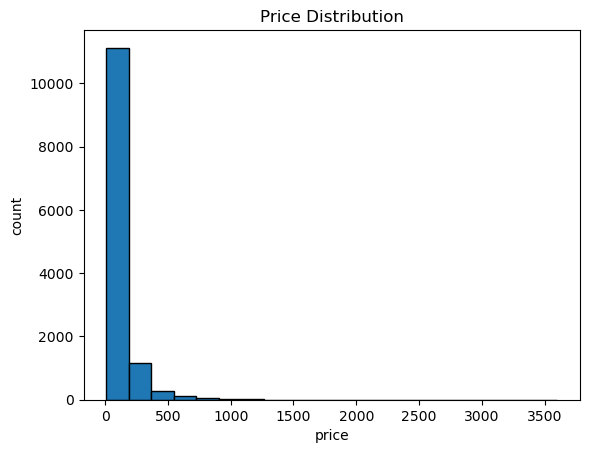

In [21]:
plt.hist(cleaned_df['price'],bins=20,edgecolor='k')
plt.xlabel('price')
plt.ylabel('count')
plt.title('Price Distribution')
plt.show()

In [22]:
# Bar plot for Area_Type

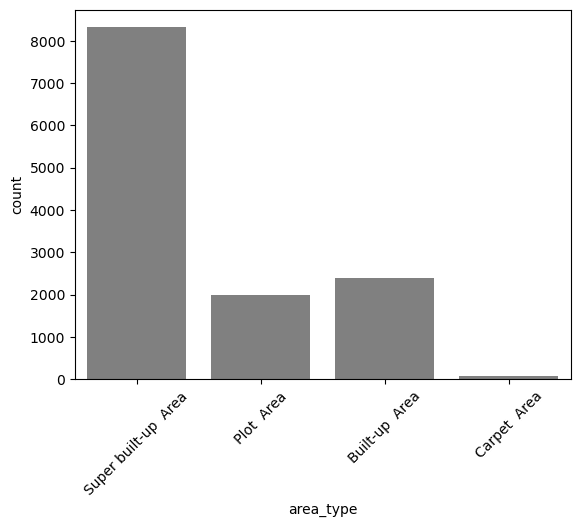

In [23]:
sns.countplot(data=cleaned_df, x='area_type',color='grey')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Data distribution viswalization

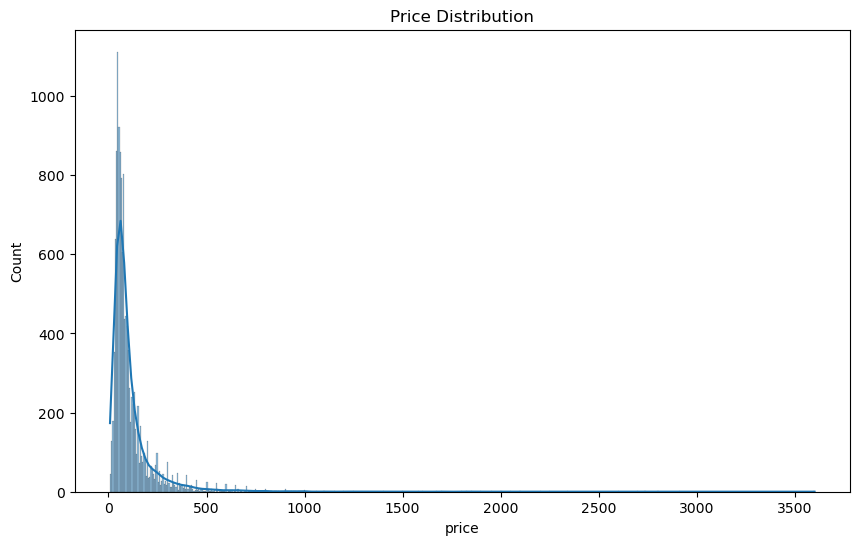

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(cleaned_df['price'], kde=True)
plt.xlabel('price')
plt.title('Price Distribution')
plt.show()

In [27]:
# Scatter plot for Total Square Feet Vs Price:

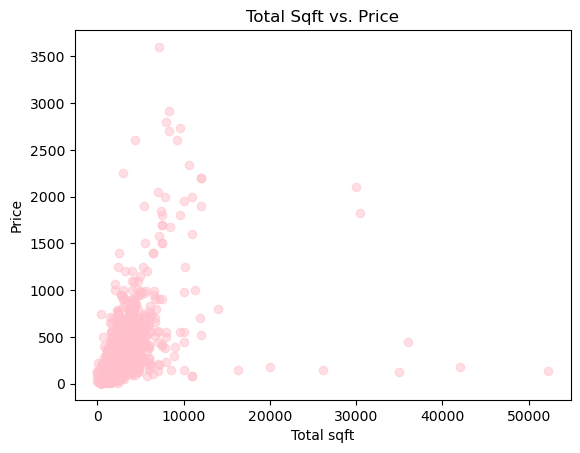

In [28]:
scatter_color = 'pink'
plt.scatter(cleaned_df['total_sqft'], df['price'], alpha=0.5, c=scatter_color)
plt.xlabel('Total sqft')
plt.ylabel('Price')
plt.title('Total Sqft vs. Price')
plt.show()

In [29]:
# Correlation Heatmap

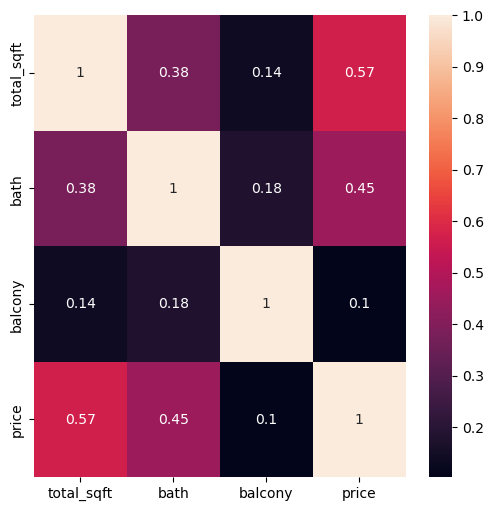

In [30]:
numeric_df = cleaned_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
# Data Modelling - Regression

In [32]:
x = df[['total_sqft', 'bath','balcony']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared error: {mse}")

Mean Squared error: 12950.36180997594


In [33]:
# DataModelling -Linear Regression

In [34]:
x = df[['total_sqft', 'bath','balcony']]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f" Linear Regression Mean Squared error: {mse}")

 Linear Regression Mean Squared error: 12124.724793569818
